# Test for stationary using ADF test

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The Augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative
number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

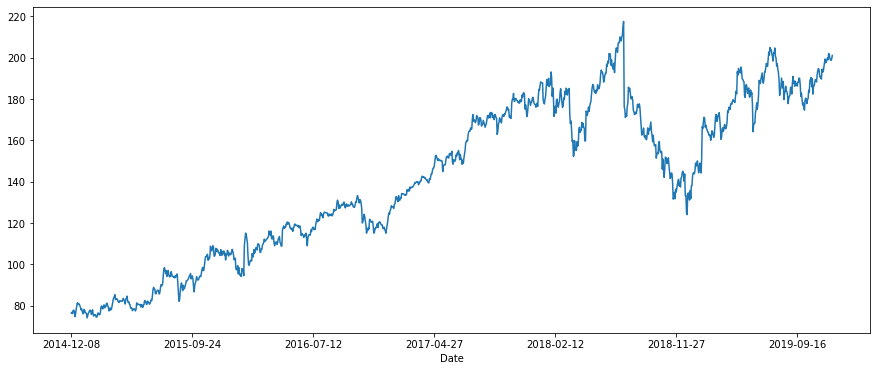

In [4]:
series = pd.read_csv(r'FB.csv', header=0, index_col=0)
series['Close'].plot(figsize=(15,6))
pyplot.show()

In [5]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','Lags Used','No. of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


**ADF test is conducted with the following assumptions:**

Null Hypothesis (HO): Series is non-stationary or series has a unit root.
Alternate Hypothesis(HA): Series is stationary or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(HO):**

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary, else otherwise.

In [6]:
Augmented_Dickey_Fuller_Test_func(series['Close'], 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistics               -1.338096
p-value                        0.611568
Lags Used                      0.000000
No. of Observations Used    1258.000000
Critical Value (1%)           -3.435559
Critical Value (5%)           -2.863840
Critical Value (10%)          -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


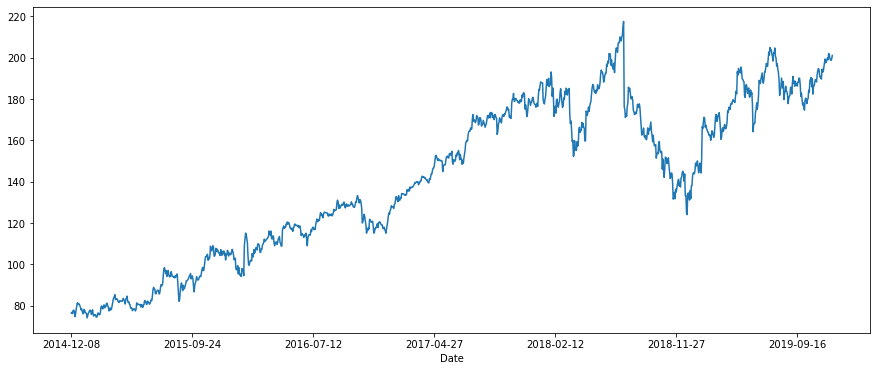

In [14]:
series['Close'].plot(figsize=(15,6))
plt.show()

In [15]:
Augmented_Dickey_Fuller_Test_func(series['Close'].diff().dropna(),'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistics              -36.114559
p-value                        0.000000
Lags Used                      0.000000
No. of Observations Used    1257.000000
Critical Value (1%)           -3.435563
Critical Value (5%)           -2.863842
Critical Value (10%)          -2.567996
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


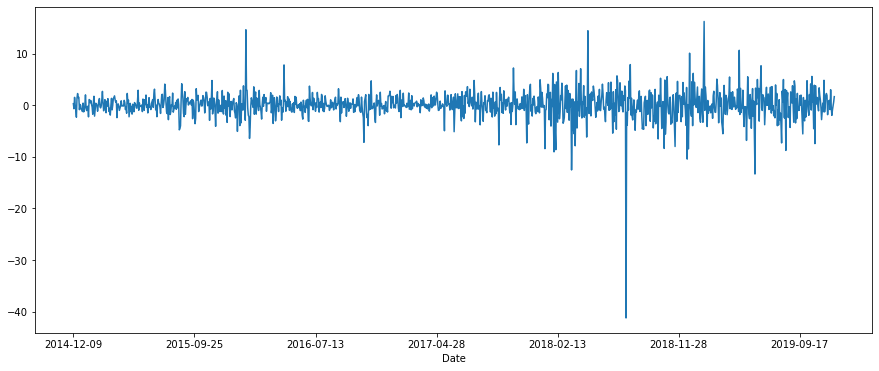

In [16]:
series['Close'].diff().dropna().plot(figsize=(15,6))
plt.title('Detrended Data')
plt.show()

In [36]:
def ADF_test(series,column):
    print(f'Result of ADF Test for column {column}')
    adftest = adfuller(series,autolag='AIC')
    output = pd.Series(adftest[0:4],index=['Test Statistics','p-Value','Lags Used','No. of Observation Used'])
    for key,value in adftest[4].items():
        output[f'Critical Value {key}'] = value
    print(output)
    if adftest[1] <= 0.05:
        print("-----Consclusion-----")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("-----Consclusion-----")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")        

# Dataset 2

In [90]:
data = pd.read_csv(r'Air Quality.csv')

In [91]:
data

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.00,17.67,39.20,32.33,7.07,6.60,0.48,...,33.43,71.67,2.30,226.33,123.67,NaN,-0.10,0.10,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.00,20.50,41.90,35.80,7.40,NaN,0.49,...,33.70,70.00,2.50,223.00,186.00,NaN,-0.10,0.10,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.00,15.40,43.60,32.78,6.35,6.38,0.47,...,33.57,63.50,1.88,223.00,240.50,NaN,-0.10,0.10,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59145,2023-03-31 19:00:00,2023-03-31 20:00:00,53.00,70.25,11.03,61.15,41.52,8.30,3.68,1.16,...,30.57,72.75,0.45,310.00,10.75,NaN,-0.20,0.85,0.0,25.23
59146,2023-03-31 20:00:00,2023-03-31 21:00:00,58.50,88.50,9.22,52.23,35.27,7.45,3.02,1.07,...,30.65,78.50,0.35,NaN,11.00,NaN,-0.20,1.05,0.0,24.62
59147,2023-03-31 21:00:00,2023-03-31 22:00:00,44.25,80.50,3.40,34.95,21.35,7.25,1.62,0.85,...,30.68,82.50,0.35,37.00,11.00,NaN,-0.20,0.73,0.0,24.23
59148,2023-03-31 22:00:00,2023-03-31 23:00:00,31.25,59.00,3.45,27.48,17.40,7.50,1.82,0.83,...,30.60,86.00,0.30,NaN,11.00,NaN,-0.15,0.88,0.0,23.82


* Processing Data

In [92]:
data.drop(columns = 'To Date',inplace=True)

In [93]:
data[['Date','Time']] = data['From Date'].str.split(' ',expand=True) 

In [94]:
data.drop(columns='From Date')

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C),Date,Time
0,10.67,39.00,17.67,39.20,32.33,7.07,6.60,0.48,14.50,1.00,...,2.30,226.33,123.67,NaN,-0.10,0.10,0.0,23.05,2016-07-01,10:00:00
1,2.00,39.00,20.50,41.90,35.80,7.40,NaN,0.49,15.00,0.70,...,2.50,223.00,186.00,NaN,-0.10,0.10,0.0,NaN,2016-07-01,11:00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01,12:00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01,13:00:00
4,20.50,50.00,15.40,43.60,32.78,6.35,6.38,0.47,10.50,0.60,...,1.88,223.00,240.50,NaN,-0.10,0.10,0.0,NaN,2016-07-01,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59145,53.00,70.25,11.03,61.15,41.52,8.30,3.68,1.16,12.30,1.55,...,0.45,310.00,10.75,NaN,-0.20,0.85,0.0,25.23,2023-03-31,19:00:00
59146,58.50,88.50,9.22,52.23,35.27,7.45,3.02,1.07,11.17,2.35,...,0.35,NaN,11.00,NaN,-0.20,1.05,0.0,24.62,2023-03-31,20:00:00
59147,44.25,80.50,3.40,34.95,21.35,7.25,1.62,0.85,10.60,1.72,...,0.35,37.00,11.00,NaN,-0.20,0.73,0.0,24.23,2023-03-31,21:00:00
59148,31.25,59.00,3.45,27.48,17.40,7.50,1.82,0.83,9.00,1.50,...,0.30,NaN,11.00,NaN,-0.15,0.88,0.0,23.82,2023-03-31,22:00:00


In [95]:
data = data.set_index('Date')

In [96]:
data.head()

,From Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C),Time
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,2016-07-01 10:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,14.5,...,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05,10:00:00
2016-07-01,2016-07-01 11:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,15.0,...,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN,11:00:00
2016-07-01,2016-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:00:00
2016-07-01,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:00:00
2016-07-01,2016-07-01 14:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,10.5,...,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN,14:00:00


Trend of the data

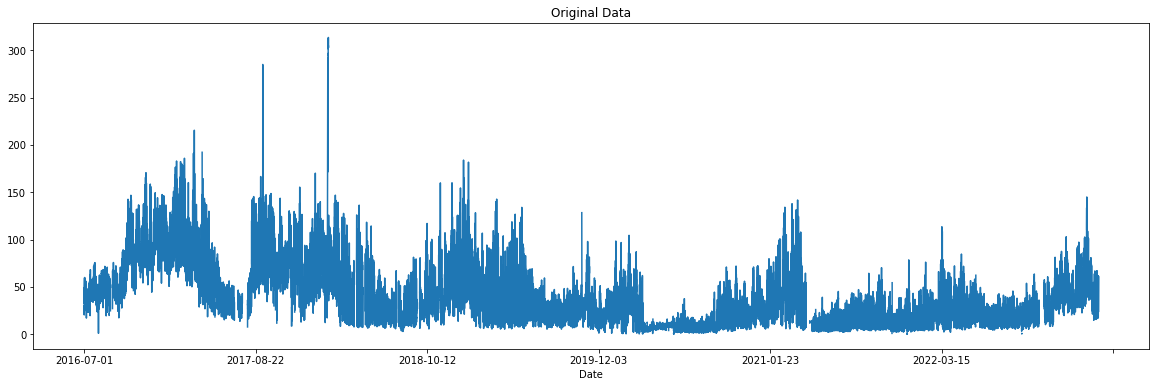

In [97]:
data['NO2 (ug/m3)'].plot(figsize=(20,6))
plt.title('Original Data')
plt.show()

Applying ADF Test to check whether the data is stationary or not

In [98]:
ADF_test(data['NO2 (ug/m3)'].dropna(),'NO2 (ug/m3)')

Result of ADF Test for column NO2 (ug/m3)
Test Statistics           -8.331533e+00
p-Value                    3.358301e-13
Lags Used                  5.900000e+01
No. of Observation Used    5.504000e+04
Critical Value 1%         -3.430469e+00
Critical Value 5%         -2.861593e+00
Critical Value 10%        -2.566798e+00
dtype: float64
-----Consclusion-----
Reject the null hypothesis
Data is stationary


Since the data is stationary, we need not apply differencing to it

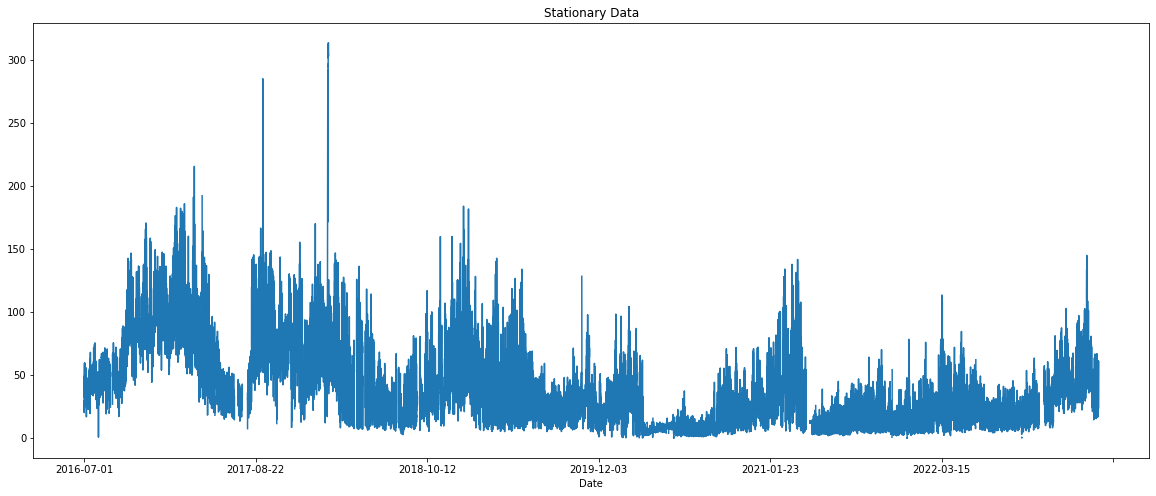

In [99]:
data['NO2 (ug/m3)'].plot(figsize=(20,8))
plt.title('Stationary Data')
plt.show()

# Dataset 3

In [106]:
data = pd.read_excel('India_Exchange_Rate_Dataset.xls')

In [108]:
data = data.set_index('observation_date')

In [109]:
data

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


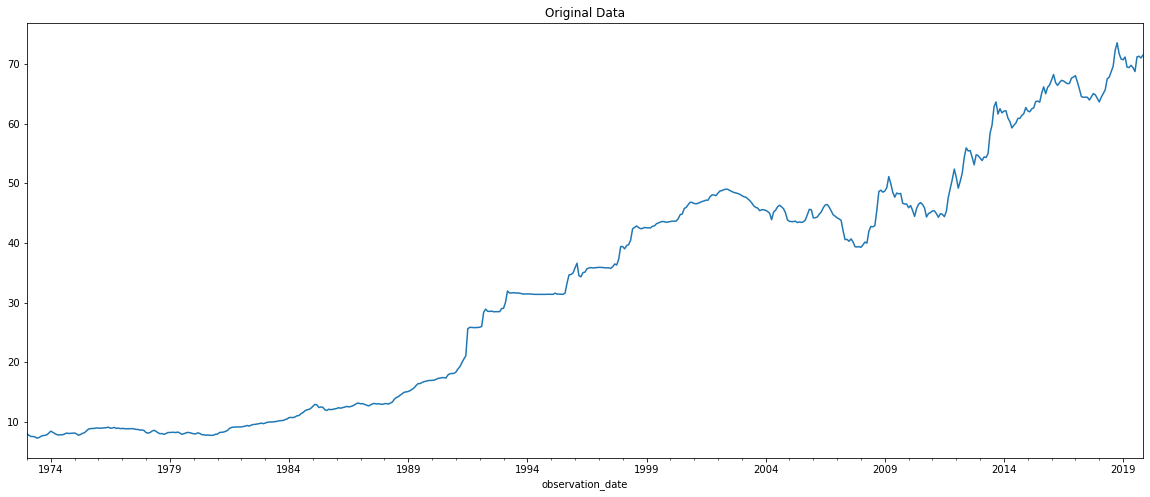

In [110]:
data['EXINUS'].plot(figsize=(20,8))
plt.title('Original Data')
plt.show()

In [111]:
ADF_test(data['EXINUS'],'EXINUS')

Result of ADF Test for column EXINUS
Test Statistics              0.805817
p-Value                      0.991729
Lags Used                   17.000000
No. of Observation Used    545.000000
Critical Value 1%           -3.442406
Critical Value 5%           -2.866858
Critical Value 10%          -2.569602
dtype: float64
-----Consclusion-----
Fail to reject the null hypothesis
Data is non-stationary


As we can see that the data is non stationary we can apply differencing to it so as to make it stationary

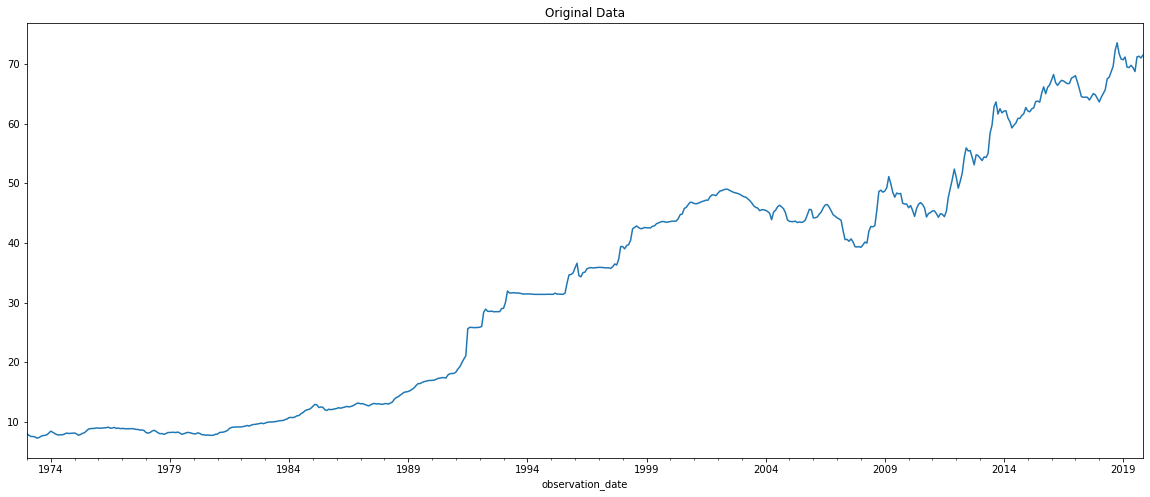

In [112]:
data['EXINUS'].plot(figsize=(20,8))
plt.title('Original Data')
plt.show()

In [114]:
ADF_test(data['EXINUS'].diff().dropna(),'EXINUS')

Result of ADF Test for column EXINUS
Test Statistics           -6.379072e+00
p-Value                    2.245677e-08
Lags Used                  1.600000e+01
No. of Observation Used    5.450000e+02
Critical Value 1%         -3.442406e+00
Critical Value 5%         -2.866858e+00
Critical Value 10%        -2.569602e+00
dtype: float64
-----Consclusion-----
Reject the null hypothesis
Data is stationary


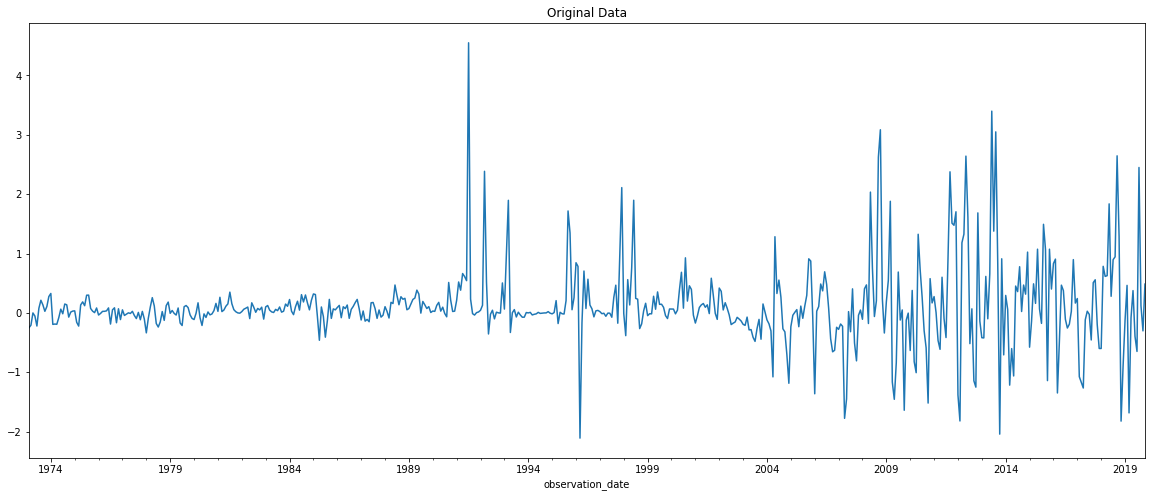

In [118]:
data['EXINUS'].diff().dropna().plot(figsize=(20,8))
plt.title('Original Data')
plt.show()

Since we have differenced we can see that the data is sataionary

# Conclusion
we have successfully explored the Augmented Dickey-Fuller (ADF) test and its practical applications. By applying the ADF test to three distinct datasets, we were able to assess the stationarity of each dataset effectively. Furthermore, we utilized differencing with the pandas library to transform non-stationary data into stationary data, thereby enhancing the reliability of our time series analyses.